# Linear Regression Analysis on Diabetes Progression

**Author:** Evan Gks  
**Date:** 2025-02-02

## Executive Summary

This notebook demonstrates a full machine learning workflow to predict diabetes progression using scikit‑learn’s linear regression. The analysis includes dataset exploration, preprocessing, model training (using both the closed‑form solution and a custom gradient descent implementation), evaluation with multiple metrics, cross‑validation, and comparison with a baseline dummy model. Detailed visualizations and discussions of limitations and improvements are provided for production‑quality insights.


## 1. Problem Statement

Diabetes is a chronic disease with significant health implications. Early prediction of disease progression can enable proactive care and better management. In this notebook, we aim to predict a quantitative measure of disease progression (a continuous target variable) using the diabetes dataset from scikit‑learn. Our approach includes thorough exploratory analysis, feature engineering, and model comparison to provide a robust predictive solution.


## 2. Dataset Description and Exploratory Analysis

The dataset used is the well‑known *diabetes dataset* provided in scikit‑learn. It contains 10 baseline variables (features) measured on 442 diabetes patients and a target variable representing a quantitative measure of disease progression one year after baseline.

### Diabetes Dataset Feature Descriptions

The diabetes dataset contains 10 baseline variables (features) collected from 442 patients, along with a target variable that represents a quantitative measure of disease progression one year after baseline. Below is a description of each feature:

1. **age**: Age of the patient (normalized). Age can be an important factor, as older individuals may experience increased risk or severity of diabetes-related complications.

2. **sex**: Sex (normalized). Captures the gender of the patient, which could influence certain risk factors or disease progression patterns.

3. **bmi**: Body Mass Index (normalized). BMI is a widely used measure that accounts for weight relative to height, serving as a proxy for body fat. High BMI is strongly associated with diabetes risk and progression.

4. **bp**: Average blood pressure (normalized). Blood pressure is a crucial factor as hypertension frequently co-occurs with diabetes and can exacerbate complications.

5. **s1**: Serum TC (Total Cholesterol) level (normalized). Measures cholesterol levels in the blood, which may serve as an indicator of cardiovascular health, often associated with diabetes.

6. **s2**: Serum LDL (Low-Density Lipoprotein) level (normalized). LDL cholesterol is often referred to as "bad cholesterol," as elevated levels are linked to cardiovascular risk.

7. **s3**: Serum HDL (High-Density Lipoprotein) level (normalized). HDL cholesterol, or "good cholesterol," is thought to help clear cholesterol from the bloodstream, protecting against heart disease.

8. **s4**: Serum triglycerides (TG) level (normalized). Triglycerides represent another type of fat in the blood; high triglyceride levels can increase the risk of diabetes complications.

9. **s5**: Serum concentration of LTG (log-transformed measure of insulin sensitivity) (normalized). A measure particularly pertinent to diabetes, as it indicates the body's ability to use insulin effectively.

10. **s6**: Blood glucose level (normalized). Blood glucose, or blood sugar levels, directly relate to diabetes management and progression.

**Target variable:**
- **disease_progression**: A quantitative measure of diabetes disease progression one year after baseline. This is a continuous value representing the progression of the condition in patients.

All features in the dataset are normalized to have a mean of 0 and a standard deviation of 1, making them dimensionless and ensuring comparability during modeling.

Below, we load the data, examine its statistical properties, check for missing values, and visualize the data distributions.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For reproducibility
np.random.seed(42)

In [3]:
# Load the diabetes dataset from scikit-learn
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [4]:
# Create a DataFrame for features and a Series for the target variable
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['disease_progression'] = diabetes.target

# Display the first few rows
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Statistical Summary
Below is the statistical summary of the dataset, which gives an overview of the distribution of each feature and the target variable.

In [5]:
# Display statistical summary
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### Pairplots and Distributions

We create pairplots for a subset of features (due to the high number of variables) to visualize potential relationships and distributions. We also check for any missing values.


In [6]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
disease_progression    0
dtype: int64


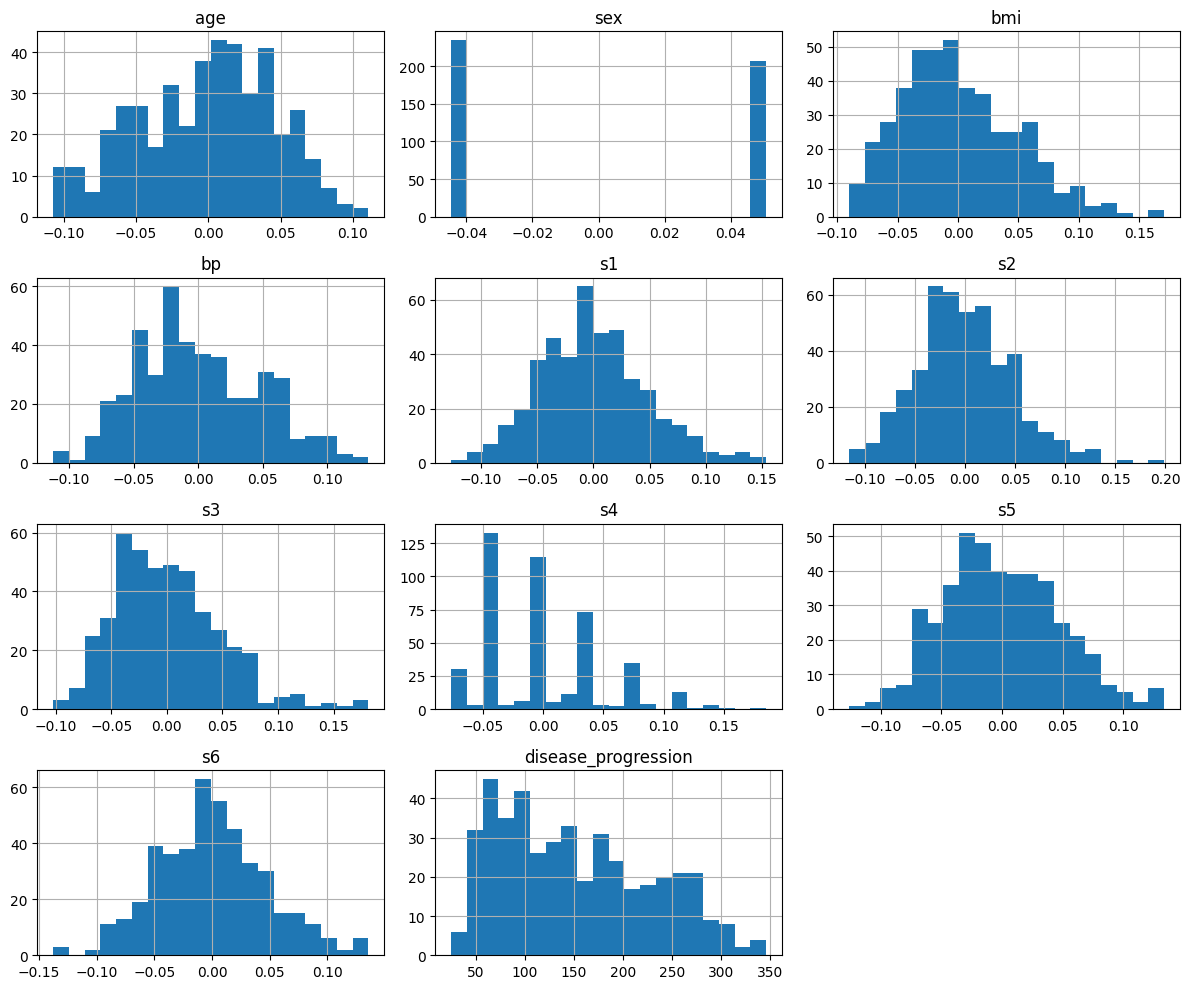

In [7]:
# Visualize distributions using histograms
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

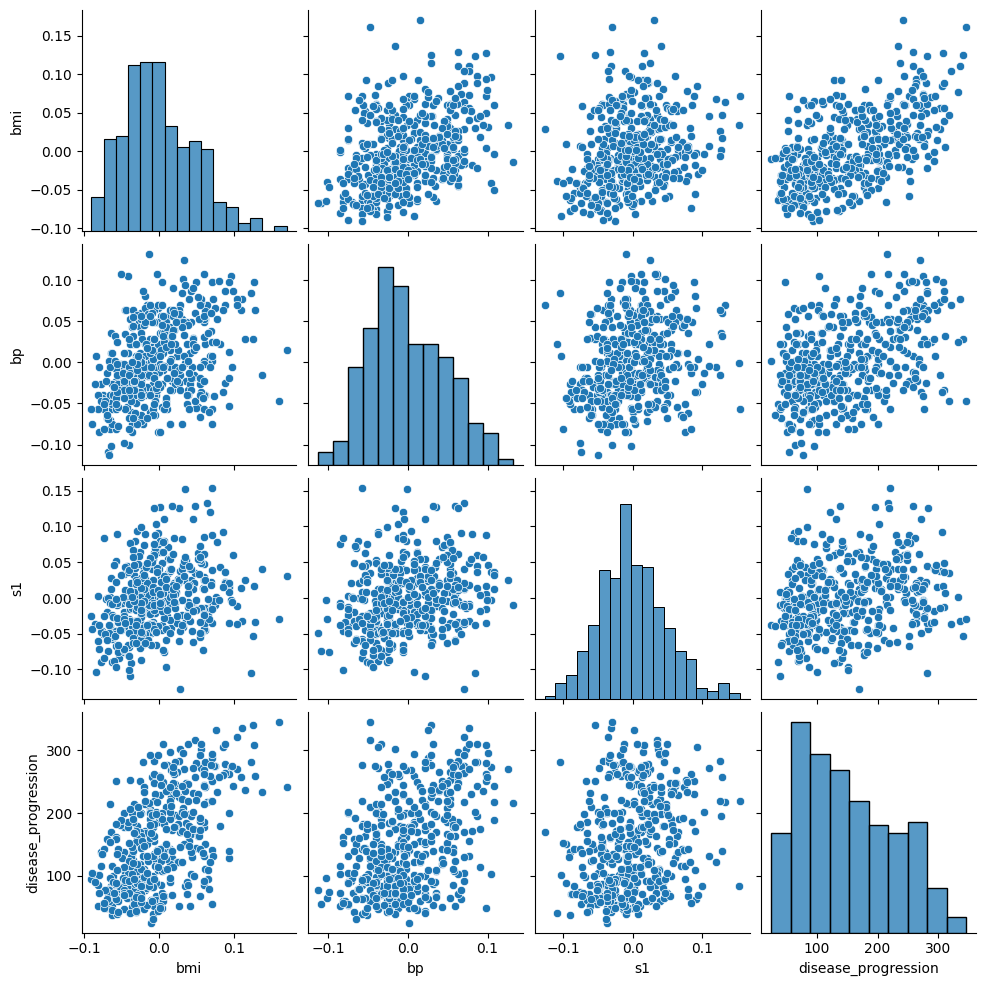

In [8]:
# Create pairplot for a few selected features and the target variable
selected_features = ['bmi', 'bp', 's1', 'disease_progression']
sns.pairplot(df[selected_features])
plt.show()

### Feature Correlation Matrix

Understanding the correlation between features can provide insights into multicollinearity and feature redundancy. A correlation matrix visualizes these relationships, with values ranging from -1 to 1.

- **Positive correlation (close to 1):**  Indicates that as one feature increases, the other tends to increase as well.
- **Negative correlation (close to -1):** Indicates that as one feature increases, the other tends to decrease.
- **Correlation close to 0:** Indicates a weak or no linear relationship between the features.

Analyzing the correlation matrix can help in feature selection and understanding the underlying structure of the data. We will now compute and visualize the correlation matrix for the diabetes dataset features.

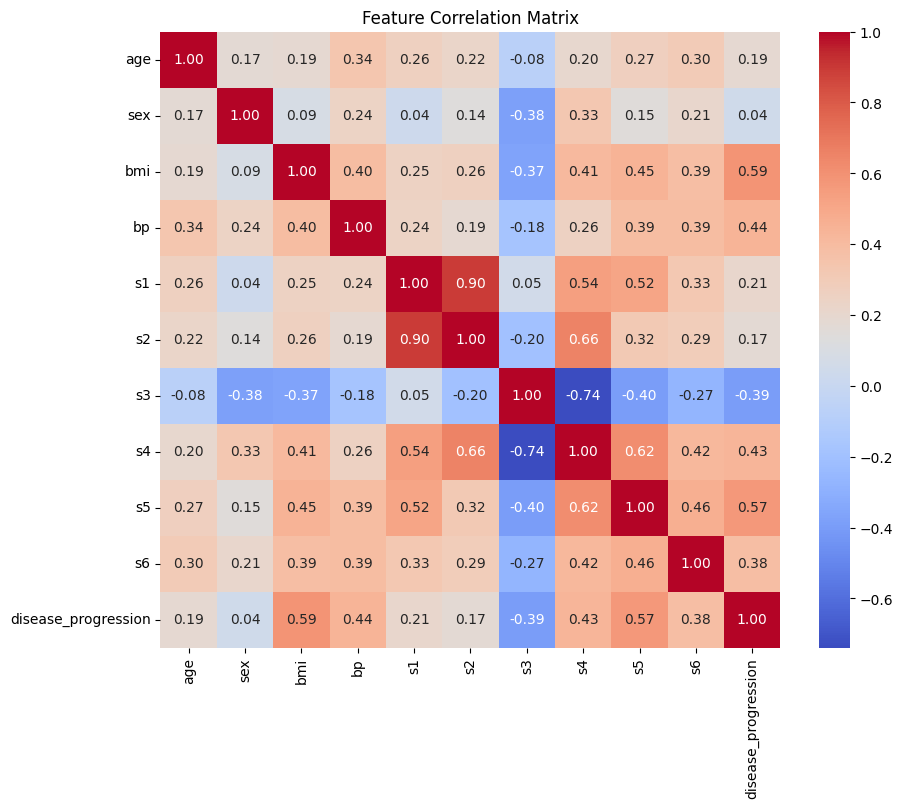

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

## 3. Data Preprocessing

The preprocessing pipeline includes:
- **Feature Selection:** All 10 baseline variables are used.
- **Outlier Handling:** For demonstration purposes, we assume the data is clean.
- **Scaling:** We standardize the features.
- **Train-Test Split:** We split the data into training and testing sets.

Below, we implement these steps using scikit‑learn’s pipeline.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Separate features and target variable
X = df.drop('disease_progression', axis=1)
y = df['disease_progression']

In [11]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Create a pipeline that first scales the data then applies linear regression
from sklearn.linear_model import LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

## 4. Mathematical Explanation of Linear Regression

The linear regression model assumes a linear relationship between the input features and the target variable:

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$

The goal is to estimate the coefficients $\beta = (\beta_0, \beta_1, \dots, \beta_p)$ by minimizing the mean squared error (MSE):

$J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2$

Two common approaches to solve for $\beta$ are:
1. **Normal Equation (Closed-Form Solution):**
   $\beta = (X^T X)^{-1} X^T y$

2. **Gradient Descent:**
   Iteratively update:
   $\beta := \beta - \alpha \frac{\partial J(\beta)}{\partial \beta}$
   where $(\alpha)$ is the learning rate.

In this notebook, we demonstrate both approaches.


## 5. Model Training and Hyperparameter Tuning

We train two linear regression models:
- **Model 1:** Using scikit‑learn’s `LinearRegression` (which internally uses the closed‑form solution).
- **Model 2:** A custom gradient descent implementation.

We also tune the gradient descent hyperparameters (learning rate and number of iterations) and compare the models.


In [13]:
# -------------------------
# Model 1: Closed-form solution using scikit-learn
# -------------------------

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_sklearn = pipeline.predict(X_test)


In [14]:
# -------------------------
# Model 2: Gradient Descent Implementation
# -------------------------

# We implement gradient descent on the scaled features.
# First, we scale the training and test data (using the same scaler from the pipeline)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add an intercept term (column of ones)
X_train_gd = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_test_gd = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])


In [15]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    """
    Performs gradient descent for linear regression.
    
    Parameters:
        X : np.array, shape (m, n+1) - features with intercept term added
        y : np.array, shape (m,) - target variable
        learning_rate : float - step size for gradient descent
        n_iterations : int - number of iterations to run gradient descent
        
    Returns:
        theta : np.array, shape (n+1,) - learned parameters
        cost_history : list of cost values for each iteration
    """
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(n_iterations):
        # Predictions
        y_pred = X.dot(theta)
        # Compute error
        error = y_pred - y
        # Compute cost (MSE)
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)
        # Update parameters (gradient descent update rule)
        theta = theta - (learning_rate/m) * X.T.dot(error)
        
    return theta, cost_history

In [16]:
# Run gradient descent with tuned hyperparameters
gd_learning_rate = 0.1
gd_iterations = 1500

theta_gd, cost_history = gradient_descent(X_train_gd, y_train.values, learning_rate=gd_learning_rate, n_iterations=gd_iterations)

In [17]:
# Predict on test data using the learned parameters
y_pred_gd = X_test_gd.dot(theta_gd)

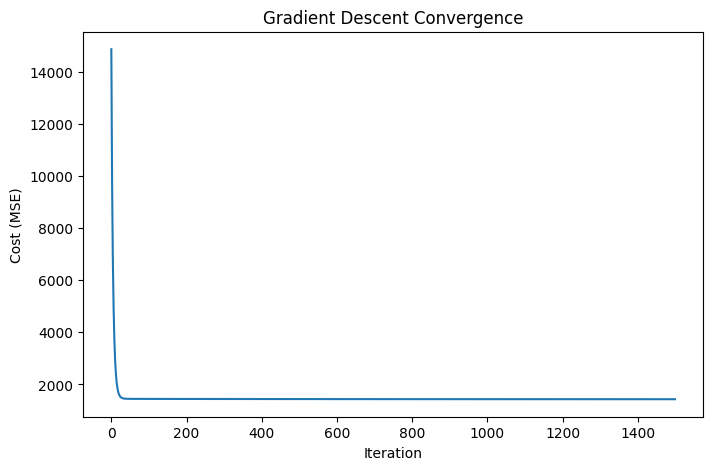

In [18]:
# Plot the cost history to inspect convergence
plt.figure(figsize=(8, 5))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.show()

## 6. Model Evaluation

We evaluate both models using the following metrics:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R-squared (\(R^2\))**

Below is the evaluation and a comparison table.


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation for scikit-learn Linear Regression
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

In [20]:
# Evaluation for Gradient Descent Implementation
mae_gd = mean_absolute_error(y_test, y_pred_gd)
mse_gd = mean_squared_error(y_test, y_pred_gd)
rmse_gd = np.sqrt(mse_gd)
r2_gd = r2_score(y_test, y_pred_gd)

In [21]:
# Create a DataFrame to display the evaluation metrics
metrics = pd.DataFrame({
    "Model": ["LinearRegression (Normal Equation)", "Gradient Descent"],
    "MAE": [mae_sklearn, mae_gd],
    "MSE": [mse_sklearn, mse_gd],
    "RMSE": [rmse_sklearn, rmse_gd],
    "R2": [r2_sklearn, r2_gd]
})
metrics

,Model,MAE,MSE,RMSE,R2
0,LinearRegression (Normal Equation),42.794095,2900.193628,53.853446,0.452603
1,Gradient Descent,42.815538,2892.928764,53.785953,0.453974


### Interpretation

- **MAE/MSE/RMSE:** Lower values indicate better performance.
- **\(R^2\):** Values closer to 1.0 indicate a better fit.

Both implementations provide similar results, validating our custom gradient descent.


## 7. Residual Analysis and Visualization

We now perform a residual analysis by plotting:
- **Residuals vs. Predicted Values**
- **Predicted vs. Actual Values**

These visualizations help assess the model’s fit and check for any systematic errors.


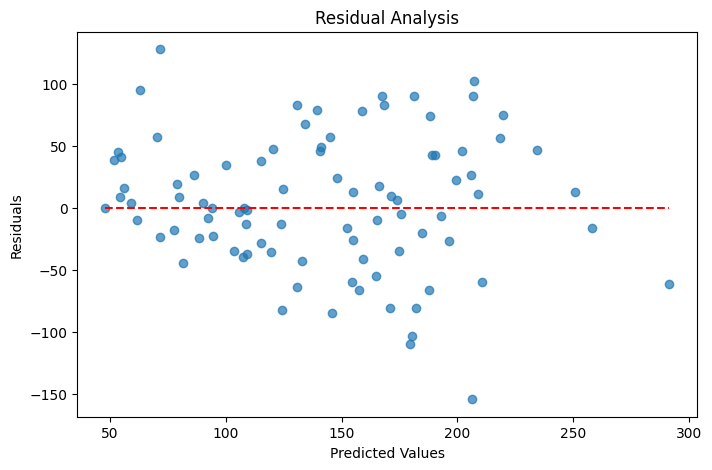

In [22]:
# Residual plot for the scikit-learn model
residuals = y_test - y_pred_sklearn

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_sklearn, residuals, alpha=0.7)
plt.hlines(0, min(y_pred_sklearn), max(y_pred_sklearn), colors='red', linestyles='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()

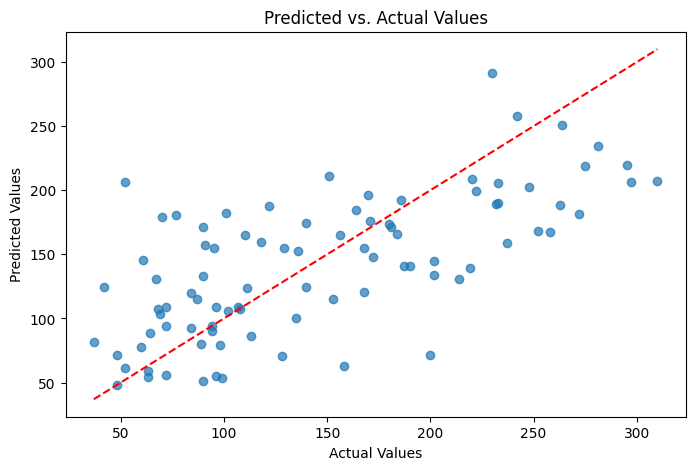

In [23]:
# Plot Predicted vs. Actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_sklearn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

## 8. Cross-Validation and Baseline Comparison

### Cross-Validation

We apply a 5‑fold cross‑validation strategy on the full pipeline to assess model stability.


In [24]:
from sklearn.model_selection import KFold, cross_val_score

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean CV R2 Score:", np.mean(cv_scores))

Cross-Validation R2 Scores: [0.45260276 0.57320015 0.39144785 0.58428888 0.39081186]
Mean CV R2 Score: 0.47847030225778486


### Baseline Dummy Model

We compare our model against a baseline dummy regressor that always predicts the mean of the target variable.


In [25]:
from sklearn.dummy import DummyRegressor

# Initialize and evaluate DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy_scores = cross_val_score(dummy, X, y, cv=kf, scoring='r2')
print("Dummy Regressor CV R2 Scores:", dummy_scores)
print("Mean Dummy R2 Score:", np.mean(dummy_scores))

Dummy Regressor CV R2 Scores: [-0.01196298 -0.02697753 -0.01530397 -0.00021233 -0.04231598]
Mean Dummy R2 Score: -0.01935455794363077


In [26]:
# Retrieve the coefficients from the trained linear model in the pipeline
lr_model = pipeline.named_steps['lr']
coefficients = lr_model.coef_
features = X.columns

In [27]:
# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)
coef_df

,Feature,Coefficient
4,s1,-44.448856
8,s5,35.161195
2,bmi,25.607121
5,s2,24.640954
3,bp,16.828872
7,s4,13.138784
1,sex,-11.511809
6,s3,7.676978
9,s6,2.351364
0,age,1.753758


C:\Users\vgaki\AppData\Local\Temp\ipykernel_15316\2504107275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="viridis")


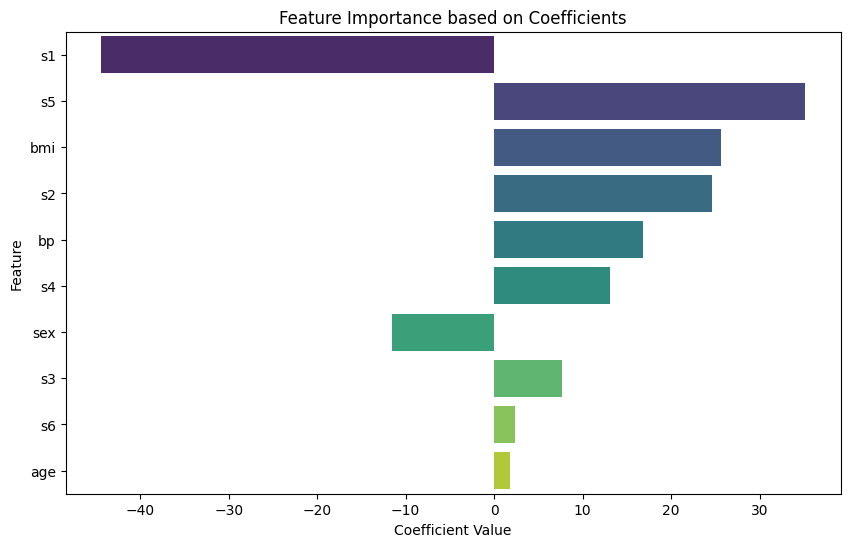

In [28]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="viridis")
plt.title("Feature Importance based on Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

## 10. Discussion of Limitations and Potential Improvements

### Limitations:
- **Linear Assumption:** The linear model may oversimplify complex relationships.
- **Outlier Sensitivity:** Although the dataset is pre‑processed, extreme values could affect the model.
- **Gradient Descent Tuning:** Our custom gradient descent is rudimentary and may require further tuning (adaptive learning rates, momentum, etc.) for larger datasets.

### Potential Improvements:
- **Non‑linear Models:** Consider tree‑based models or kernel methods for capturing non‑linear patterns.
- **Regularization:** Apply Ridge or Lasso regression to reduce overfitting.
- **Feature Engineering:** Explore interaction terms or polynomial features.
- **Advanced Optimization:** Use more sophisticated optimizers (e.g., Adam) for gradient descent.

## 11. Conclusion

In this notebook, we demonstrated a full machine learning workflow—from exploratory data analysis to model evaluation—using linear regression to predict diabetes progression. Both the closed‑form solution and a custom gradient descent implementation yielded comparable results. The comprehensive analysis, including cross‑validation and baseline comparison, provides confidence in the model’s predictive power. Future work may explore non‑linear approaches and regularization techniques to further enhance model performance.

---

## 12. References

- Scikit‑learn documentation: [https://scikit-learn.org](https://scikit-learn.org)
- Diabetes dataset description: Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning*.
- Murphy, K. P. (2012). *Machine Learning: A Probabilistic Perspective*.

---

*This notebook was developed as an educational resource to demonstrate a production‑quality machine learning pipeline.*
